# <center>Hands-On: Curso Preditiva

### Regressão Linear Múltipla no Python:

* Múltiplas variáveis explicativas;
* Variáveis explicativas qualitativas;
* Diagnóstico do modelo.

***Problema:*** Entender como diferentes variáveis podem influenciar o salário dos colaboradores recém-chegados.

## Importação de biblioteca

In [128]:
#pacote de manipulação de dados
import pandas as pd
import numpy as np

#pacotes de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#pacotes de modelagem
import statsmodels.api as sm

## Importação da base de dados

In [129]:
df = pd.read_csv('base_funcionarios_v4.csv')

In [130]:
display(df.head(5))

,Unnamed: 0,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
0,0,5517.4,3,3,9.777079,Não
1,1,6399.9,4,6,3.765998,Não
2,2,6206.7,6,3,7.926264,Não
3,3,6060.6,4,5,2.233497,Não
4,4,6122.7,2,9,26.821842,Não


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          46 non-null     int64  
 1   Salario             46 non-null     float64
 2   Anos_Educ_Superior  46 non-null     int64  
 3   Tempo_Empresa       46 non-null     int64  
 4   Tempo_de_Carreira   46 non-null     float64
 5   Possui_Skill_Dados  46 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 2.3+ KB


In [132]:
df.describe()

,Unnamed: 0,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,22.500000,6969.797826,5.065217,10.326087,21.194106
std,13.422618,1924.868873,2.839422,7.601328,15.869038
min,0.000000,4139.500000,0.000000,0.000000,-3.235467
25%,11.250000,5818.350000,4.000000,5.250000,9.621697
50%,22.500000,6394.750000,5.000000,8.500000,17.689876
75%,33.750000,7972.400000,6.000000,17.250000,29.773380
max,45.000000,12118.100000,12.000000,27.000000,67.858714


In [133]:
df['Possui_Skill_Dados'].describe()

count      46
unique      2
top       Não
freq       31
Name: Possui_Skill_Dados, dtype: object

In [134]:
df = df.drop(columns=['Unnamed: 0'])

## Análise exploratória de dados

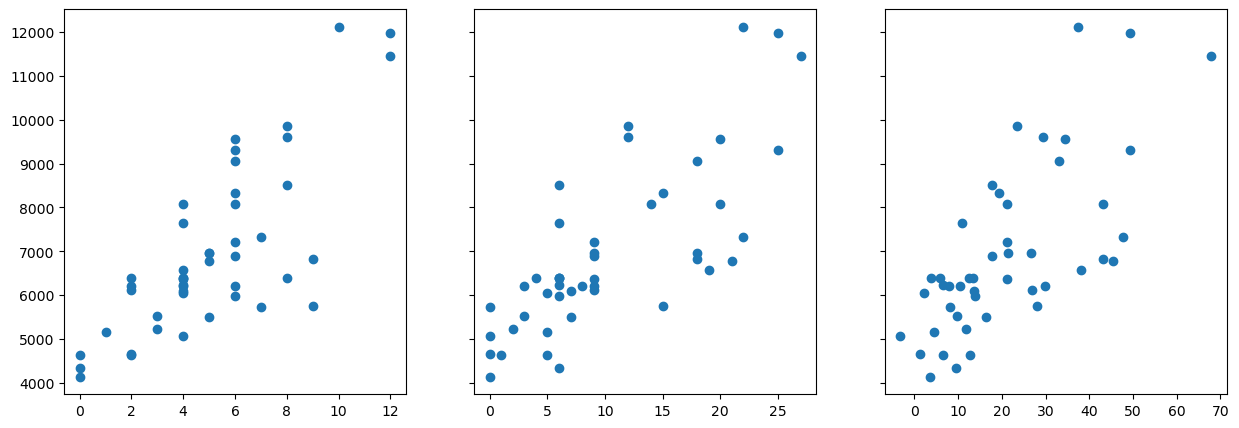

In [135]:
# Gráfico de dispersão:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

ax1.scatter(df['Anos_Educ_Superior'],
            df['Salario']);

ax2.scatter(df['Tempo_Empresa'],
            df['Salario']);

ax3.scatter(df['Tempo_de_Carreira'],
            df['Salario']);

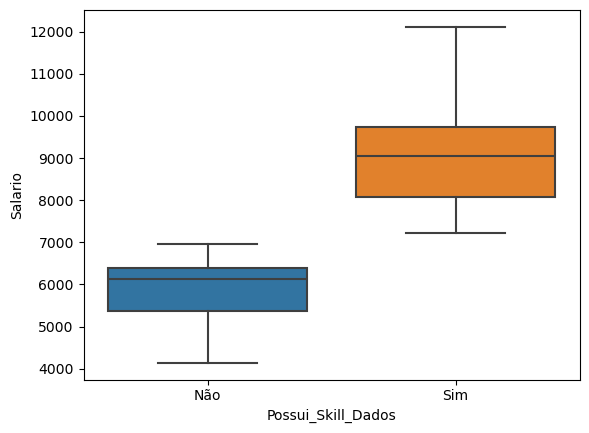

In [136]:
sns.boxplot(x=df['Possui_Skill_Dados'],
            y=df['Salario']);

Podemos observar que os salários de quem possui Skill em dados é maior.

## Preparação dos dados

### Criando uma variável Dummy

In [137]:
# df2 = pd.get_dummies(df, drop_first=True)
# df2.sample(5, random_state=42)


In [138]:
df3 = df.copy() #copia o DF
df3['Possui_Skill_Dados'] = np.where(df['Possui_Skill_Dados'] == 'Sim', 1, 0) #tipo um se() no excel
df3.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
39,8082.2,4,20,43.252417,1
25,4645.9,0,5,12.640970,0
26,5736.9,7,0,8.222066,0
44,6235.4,4,6,6.578993,0
35,9857.1,8,12,23.448417,1


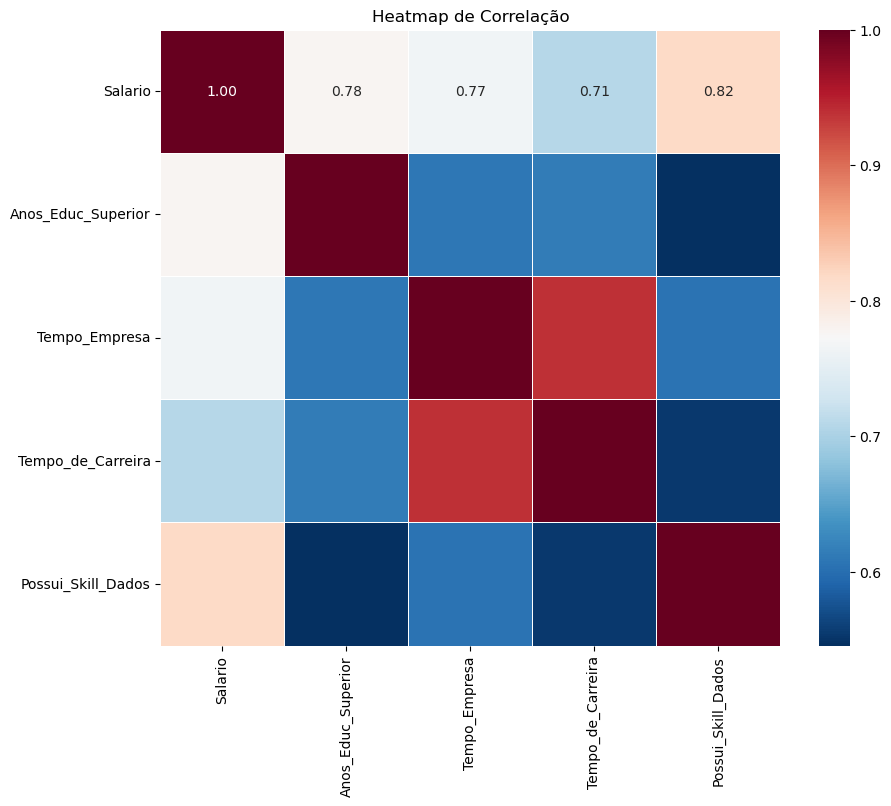

In [139]:
correlation_matrix = df3.corr()

# Plotar o heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()




In [140]:
# Ajuste do modelo de regressão usando a biblioteca Statsmodels

In [141]:
# Variável resposta
y = df3['Salario']

# Variáveis explicativas
df3['intercepto'] = 1

x = df3[['intercepto',
        'Anos_Educ_Superior',
        'Tempo_Empresa',
        'Tempo_de_Carreira',
       'Possui_Skill_Dados']]

In [142]:
# Ajustar o modelo e retornar o resultado
modelo = sm.OLS (y,x)
resultado = modelo.fit()

In [143]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     66.10
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.49e-17
Time:                        09:33:52   Log-Likelihood:                -366.46
No. Observations:                  46   AIC:                             742.9
Df Residuals:                      41   BIC:                             752.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4405.3062    235

Como identificamos um problema de multicolinearidade, e o coeficiente da variável 'Tempo_de_Carreira' apresentou-se estaticamente igual a zero, vamo exclui-la do modelo.

As informações contidas na variável 'Tempo_de_Carreira' já estão representadas na variável 'Tempo_Empresa'. Podemos observar nisso no gráfico de correlação, a correlação entre as variáveis é de 0.94%.        

In [144]:
x2 = df3[['intercepto',
        'Anos_Educ_Superior',
        'Tempo_Empresa',
        'Possui_Skill_Dados']]

modelo2 = sm.OLS (y,x2)
resultado2 = modelo2.fit()
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     87.90
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.87e-18
Time:                        09:33:52   Log-Likelihood:                -366.99
No. Observations:                  46   AIC:                             742.0
Df Residuals:                      42   BIC:                             749.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4412.5391    235

## Diagnóstico do modelo: Análise dos resíduos

In [145]:
def grafico_residuos(resultado2):
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado2.resid_pearson))),
                                 y=resultado2.resid_pearson.tolist())
    # Localizando o valor mínimo dos resíduos
    r_aux = resultado2.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1

    # Localizando o valor máximo dos resíduos
    r_aux = resultado2.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1

    resid_graf.set(ylim=(ymin,ymax))

    ax1 = resid_graf.axes
    ax1.axhline (0, color='black', ls='--')
    ax1.axhline (-2, color='black', ls='--')
    ax1.axhline (+2, color='black', ls='--')
    plt.show()

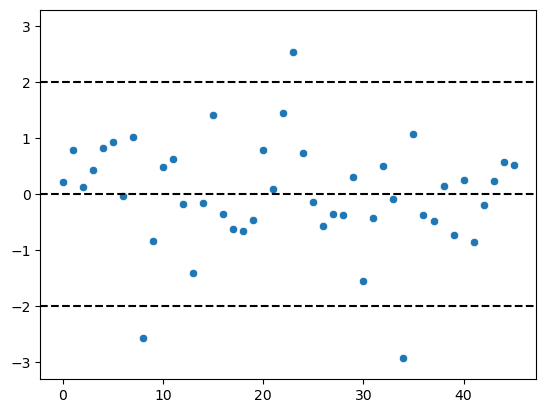

In [146]:
grafico_residuos(resultado2)

In [147]:
#nº de pontos que podem ficar nos 5% fora
len(df3.index)*0.05

2.3000000000000003

# Normalidade dos resíduos

In [148]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

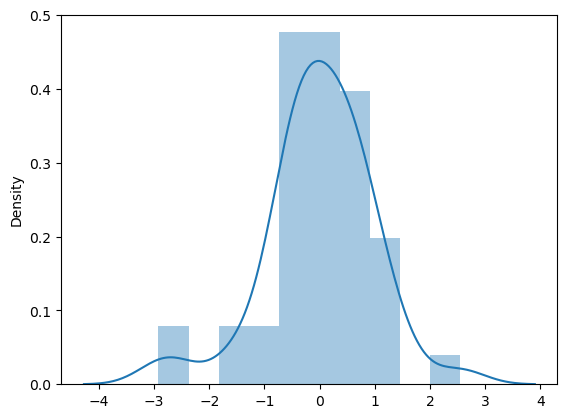

In [149]:
# Construção de histograma para avaliar a distribuição dos resíduos
sns.distplot (resultado2.resid_pearson);

Parece uma distribuição normal, porém vamos rodar um teste de hipóteses para verificar.

In [150]:
# Realização do teste de hipótese para avaliar a Normalidade
from scipy.stats import shapiro
normalidade = shapiro(resultado2.resid_pearson)
print('Estatística=%.3f, p-valor= %.3f\n' % (normalidade.statistic, normalidade.pvalue))


Estatística=0.951, p-valor= 0.054




H0 = distribuição normal.

O p-valor é de 5,4%, o que é maior que 5%. Isso indica que a hipótese nula é plausível. Portanto, não rejeitamos H0, o que sugere que temos uma distribuição normal.

## Homocedasticidade dos resíduos

In [151]:
from statsmodels.stats.diagnostic import het_white

# estamos criando uma lista chamada `labels` que contém rótulos para as estatísticas que serão calculadas.
labels = ['Lm Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']


In [152]:
# Esta linha calcula o teste de heterocedasticidade de White. O teste de White é uma maneira de verificar se a variância dos erros de um modelo de regressão é constante, o que é uma suposição comum em muitos modelos estatísticos. Ele recebe como argumentos os resíduos padronizados (`resultado2.resid_pearson`) e as variáveis exógenas do modelo 
white_test = het_white(resultado2.resid_pearson,
                       resultado2.model.exog)
#Então, o código cria rótulos para as estatísticas calculadas e executa o teste de heterocedasticidade de White, mostrando os resultados em um formato mais legível usando um dicionário.
print(dict(zip(labels, white_test)))

{'Lm Statistic': 11.715298949479552, 'LM-Test p-value': 0.16436570335976225, 'F-Statistic': 1.5803917193707135, 'F-Test p-value': 0.16425024727281182}


Esses códigos fornecem os resultados do teste de heterocedasticidade de White, que é uma maneira de verificar se a variância dos erros de um modelo de regressão é constante. Aqui está o que cada parte significa:

- `'Lm Statistic': 11.715298949479552`: Este é o valor da estatística LM (Lagrange Multiplier), que é uma medida da presença de heterocedasticidade nos resíduos do modelo. Quanto maior o valor, maior a evidência de heterocedasticidade.

- `'LM-Test p-value': 0.16436570335976225`: Este é o valor-p associado ao teste LM. Ele indica a probabilidade de obter um valor da estatística LM igual ou mais extremo do que o observado, assumindo que a hipótese nula (de homocedasticidade, ou seja, de que a variância dos erros é constante) é verdadeira. Um valor-p maior sugere que não há evidência significativa contra a hipótese nula.

- `'F-Statistic': 1.5803917193707135`: Este é o valor da estatística F, que também é usada para testar a heterocedasticidade. É uma medida da relação entre as variâncias dos resíduos em diferentes grupos.

- `'F-Test p-value': 0.16425024727281182`: Este é o valor-p associado ao teste F. Assim como no teste LM, indica a probabilidade de obter um valor da estatística F igual ou mais extremo do que o observado, assumindo que a hipótese nula (de homocedasticidade) é verdadeira. Um valor-p maior sugere que não há evidência significativa contra a hipótese nula.

Portanto, esses valores e seus valores-p associados fornecem informações sobre a presença de heterocedasticidade nos resíduos do modelo. Valores-p maiores indicam uma menor evidência contra a hipótese nula de homoceda

H0 = são homocedasticos (valores são constantes), não há evidências suficientes para rejeitar a hipótese nula.sticidade.


## Equação do modelo

  "Salário = $\\beta_0$ + $\\beta_1$ x Anos Educação Superior + $\\beta_2$ x Tempo Empresa + $\\beta_3$ x Possui Skill Dados (Sim)"

## Interpretação do modelo:

 **Intercepto:** Salário médio de um colaborador recém chegado na empresa: `R$ 4.412,53`.
 
 **Anos de educação profissional:** Cada ano adicional de educação superior, mantendo tempo de empresa constante, gera um aumento médio de `R$247,88`.

 **Tempo de empresa:** Cada ano adicional de empresa, mantendo os anos de educação superior constante, gera um aumento médio de `R$67.26`.

 **Possui Skill dados:** Se possuir ou adquirir Skills de dados, mantendo os anos de educação superior e tempo de empresa constantes, gera um aumento médio de `R$1.861.77`.
